In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
df= pd.read_csv('/content/Dataset .csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
def preprocess_text(text):
    text=text.lower()
    text=re.sub(r'[^\w\s]','',text)
    return text.split()
df['cleaned_reviews']=df['Rating text'].apply(preprocess_text)

In [4]:
positive_words=['delicious','amazing','excellent','fantastic','great']
negative_words=['disappointing','horrible','terrible','awful','bad']

def count_keywords(text,keywords):
    keyword_counts=Counter(text)
    return sum(keyword_counts[word] for word in keywords)

df['positive_keyword_count']=df['cleaned_reviews'].apply(lambda x: count_keywords(x,positive_words))
df['negative_keyword_count']=df['cleaned_reviews'].apply(lambda x: count_keywords(x,negative_words))

df['review_length']=df['cleaned_reviews'].apply(len)
average_review_length=df['review_length'].mean()

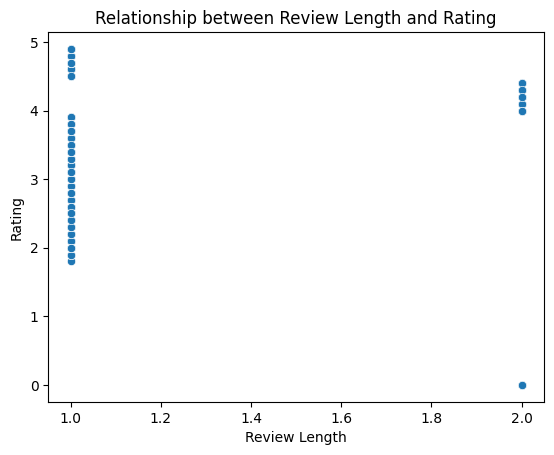

In [5]:
sns.scatterplot(x='review_length',y='Aggregate rating',data=df)
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.title('Relationship between Review Length and Rating')
plt.show()

In [6]:
correlation=df['review_length'].corr(df['Aggregate rating'])
print(f'correlation between Review length and Rating: {correlation}')

correlation between Review length and Rating: -0.5995731124014931


**Level 3**
Task 2
Task: Votes Analysis

In [7]:
df_sorted_by_votes=df.sort_values(by='Votes',ascending=False)
restaurant_highest_votes=df_sorted_by_votes.iloc[0]
restaurant_lowest_votes=df_sorted_by_votes.iloc[-1]

print('Restaurant With the Highest Number of Votes:')
print(restaurant_highest_votes)
print('\nRestaurant With the Lowest Number of Votes:')
print(restaurant_lowest_votes)

Restaurant With the Highest Number of Votes:
Restaurant ID                                                         51705
Restaurant Name                                                        Toit
Country Code                                                              1
City                                                              Bangalore
Address                   298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                        Indiranagar
Locality Verbose                                     Indiranagar, Bangalore
Longitude                                                         77.640709
Latitude                                                          12.979166
Cuisines                                           Italian, American, Pizza
Average Cost for two                                                   2000
Currency                                                 Indian Rupees(Rs.)
Has Table booking                          

# analyze if there is correlation between the number of votes and the rating of a restaurant


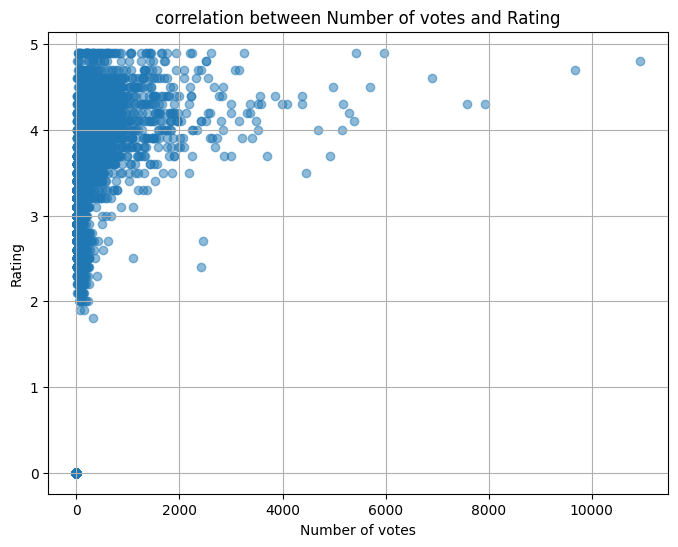

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df['Votes'],df['Aggregate rating'],alpha=0.5)
plt.xlabel('Number of votes')
plt.ylabel('Rating')
plt.title('correlation between Number of votes and Rating')
plt.grid(True)
plt.show()

In [9]:
correlation_coefficient=df['Votes'].corr(df['Aggregate rating'])
print('correlation coefficient:',correlation_coefficient)

correlation coefficient: 0.31369058419541157


**Level 3**
Task Price Range vs. Online Delivery and
Table Booking

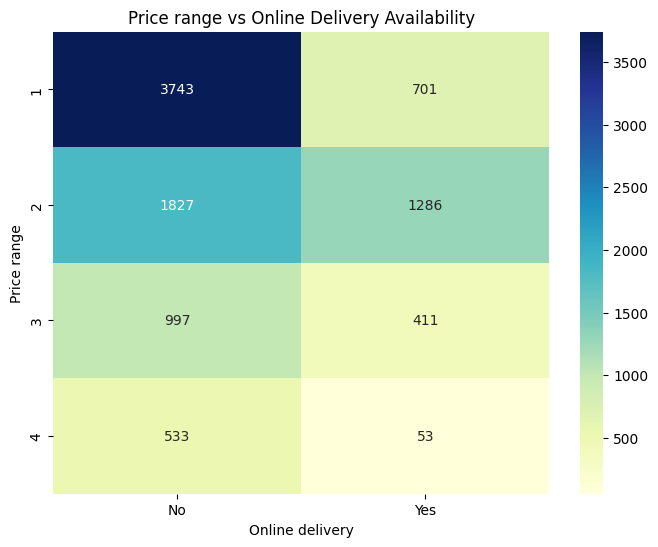

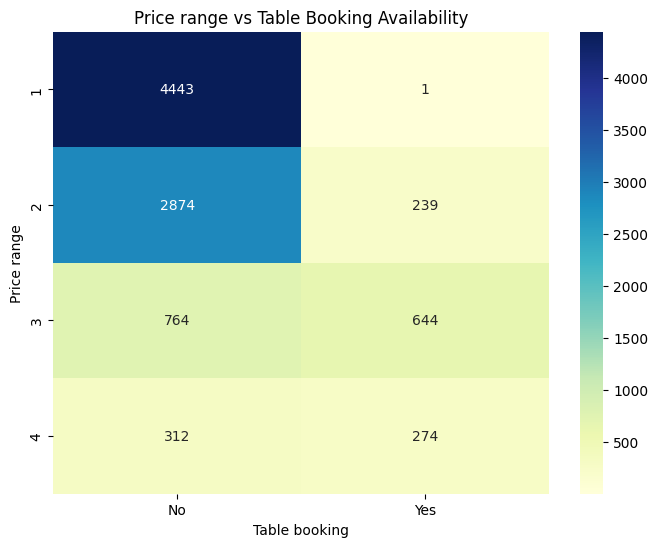

In [10]:
cross_tab_delivery=pd.crosstab(df['Price range'],df['Has Online delivery'])
cross_tab_booking=pd.crosstab(df['Price range'],df['Has Table booking'])

plt.figure(figsize=(8,6))
sns.heatmap(cross_tab_delivery,annot=True,cmap='YlGnBu',fmt='d')
plt.xlabel('Online delivery')
plt.ylabel('Price range')
plt.title('Price range vs Online Delivery Availability')
plt.show()


plt.figure(figsize=(8,6))
sns.heatmap(cross_tab_booking,annot=True,cmap='YlGnBu',fmt='d')
plt.xlabel('Table booking')
plt.ylabel('Price range')
plt.title('Price range vs Table Booking Availability')
plt.show()

#determine if higher priced restaurants are more likely to offer these services

In [12]:
from scipy import stats

In [13]:
cross_tab_delivery=pd.crosstab(df['Price range'],df['Has Online delivery'])
cross_tab_booking=pd.crosstab(df['Price range'],df['Has Table booking'])

chi2_delivery,p_value_delivery,_,_=stats.chi2_contingency(cross_tab_delivery)
chi2_booking,p_value_booking,_,_=stats.chi2_contingency(cross_tab_booking)

alpha=0.5
higher_priced_delivery= p_value_delivery < alpha
higher_priced_booking = p_value_booking < alpha

print('Are higher priced restaurants more likely to offer Online delivery?',higher_priced_delivery)
print('Are higher priced restaurants more likely to offer booking?',higher_priced_booking)

Are higher priced restaurants more likely to offer Online delivery? True
Are higher priced restaurants more likely to offer booking? True
